In [1]:
#%matplotlib Tk

import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation, ArtistAnimation
#from rydbperc.cython_utilities import util
from rydbperc import ryperc
import numpy as np

density =  0.78125
0


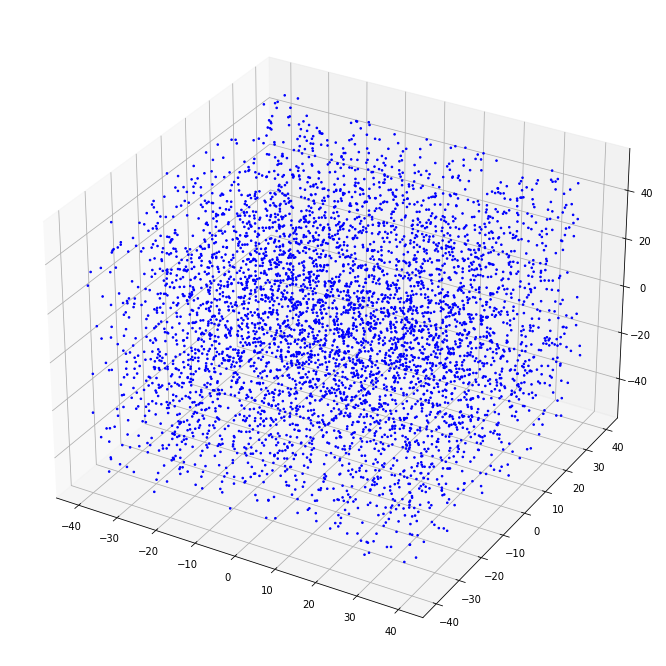

In [2]:
N_points = 5000
radius_MOT = 20
radius_shell = 4
delta_radius_shell = 2
p_spont_exc = 0.001
p_spont_emi = 0.1
p_facilitation = 0.01

shape = [80,80,100]
density = N_points/(shape[0]*shape[1]*shape[2]*10**-2) # atoms/cm^3

print("density = ",density)
clu = ryperc.cluster3D(N_points, shape, distribution="uniform", is_2D=False)

clu.set_evolution_parameters(
                            shell_radius=radius_shell, 
                            shell_delta=delta_radius_shell, 
                            p_spont_exct=p_spont_exc, 
                            p_emission=p_spont_emi, 
                            p_fac=p_facilitation
                            )

clu.evolve(100, excitation_steps=10)
print(len(clu.cluster_excited))
clu.show()

status: 2 %
status: 4 %
status: 6 %
status: 8 %
status: 10 %
status: 12 %
status: 14 %
status: 16 %
status: 18 %
status: 20 %
status: 22 %
status: 24 %
status: 26 %
status: 28 %
status: 30 %
status: 32 %
status: 34 %
status: 36 %
status: 38 %
status: 40 %
status: 42 %
status: 44 %
status: 46 %
status: 48 %
status: 50 %
status: 52 %
status: 54 %
status: 56 %
status: 57 %
status: 60 %
status: 62 %
status: 64 %
status: 66 %
status: 68 %
status: 70 %
status: 72 %
status: 74 %
status: 76 %
status: 78 %
status: 80 %
status: 82 %
status: 84 %
status: 86 %
status: 88 %
status: 90 %
status: 92 %
status: 94 %
status: 96 %
status: 98 %
status: 100 %


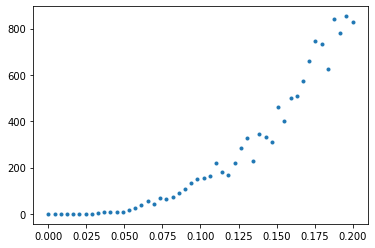

In [3]:
p_facilitation_range = np.linspace(0,0.2,50)
just_repetitions = 5
N_steps = 100
N_exct = []
N_s = []

for i, p_facilitation in enumerate(p_facilitation_range):
    reps = []
    for _ in range(just_repetitions):
        clu = ryperc.cluster3D(N_points, shape)#, distribution="unifo", MOT_radius=radius_MOT)

        clu.set_evolution_parameters(
                                    shell_radius=radius_shell, 
                                    shell_delta=delta_radius_shell, 
                                    p_spont_exct=p_spont_exc, 
                                    p_emission=p_spont_emi, 
                                    p_fac=p_facilitation
                                    )

        clu.evolve(steps=N_steps, excitation_steps=10)
        reps.append(len(clu.cluster_excited))
        
    print("status: %d %%"%((i+1)/len(p_facilitation_range)*100))
    N_exct.append(np.mean(reps))
    N_s.append(reps)

plt.plot(p_facilitation_range, N_exct, ".")
plt.show()


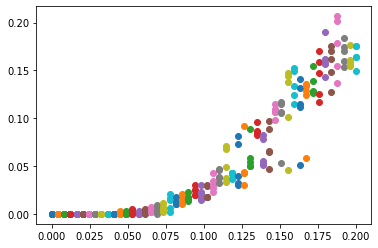

In [ ]:
for i in range(len(p_facilitation_range)):
    plt.plot(just_repetitions * [p_facilitation_range[i]], np.array(N_s[i])/N_points, linestyle="", marker="o")

In [39]:
p_facilitation_range[1]

0.02040816326530612

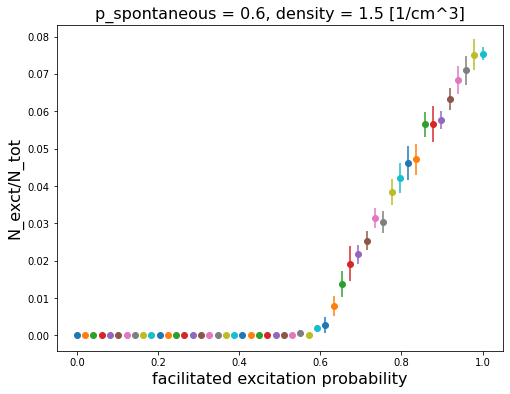

In [60]:
plt.figure(figsize=(8,6))
for i in range(len(p_facilitation_range)):
    plt.errorbar(p_facilitation_range[i], (np.mean(N_s[i])/N_points), (np.std(N_s[i])/N_points), linestyle="", marker="o")

plt.title("p_spontaneous = 0.6, density = 1.5 [1/cm^3]", fontsize=16)
plt.ylabel("N_exct/N_tot", fontsize=16)
plt.xlabel("facilitated excitation probability", fontsize=16)
plt.show()

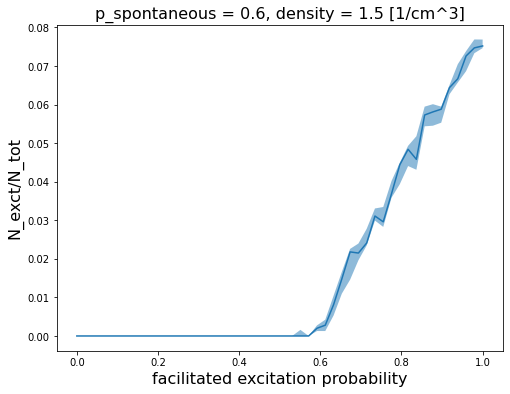

In [61]:
plt.figure(figsize=(8,6))
#for i in range(len(p_facilitation_range)):
    #plt.errorbar(p_facilitation_range[i], (np.mean(N_s[i])/N_points), (np.std(N_s[i])/N_points), linestyle="", marker="o")
up,median,down = np.quantile(N_s,[.2, .5, .8], axis = 1)
plt.plot(p_facilitation_range, median/N_points, "-")
plt.fill_between(p_facilitation_range, down/N_points, up/N_points, alpha=0.5)
plt.title("p_spontaneous = 0.6, density = 1.5 [1/cm^3]", fontsize=16)
plt.ylabel("N_exct/N_tot", fontsize=16)
plt.xlabel("facilitated excitation probability", fontsize=16)
plt.show()